## Class 1
Revising basics of pandas and seaborn  
Revising basic statistical tests  
Examining sources of error in data  

### How reliable is your data?

Much has been made of a link between brain size and intelligence. We will test this by correalating head circumference with the marks in the warm-up quiz

### Method. 
Each group of 5 should have a tapemeasure.  
Two people should each measure the heads of everyone in the group and everyone in the group beside you.  
Wrap the tape measure around just above the ears.  
Everyone will get measured 4 times.  Be fast!

### Data Entry. 
Make a python dataframe for your data from lists of Measurer, Group, Group-member, Head_diameter

In [1]:
# Analysis modules
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro

Enter your data into python lists.   Just replace the numbers and names here with your own.

In [15]:
Group_member = ['Aaron', 'Alice', 'Charlie', 'Thibauld', 'Thu', 'Pakkapol', 'Saima', 'Hillary', 'Faye', 'Xiao-feng']
Group = ['us', 'us', 'us', 'us', 'us', 'them','them','them','them','them']
Charlie_measure = [56,58,51,55,52,50,54,53,58,57,]
Thu_measure = [56,57,52,56,51,52,55,54,57,57]

Combine lists into a dataframe

In [16]:
zipped = list(zip(Group_member, Group, Charlie_measure, Thu_measure ))
df = pd.DataFrame(zipped, columns=['Group_member', 'Group', 'Charlie', 'Thu'])

We now have a pandas dataframe.  It has an index running along the left hand, column names on the top.  There are useful fucntions for checking and summarising it.

#### Check things look right

In [17]:
df.shape

(10, 4)

In [18]:
df.head(3)

,Group_member,Group,Charlie,Thu
0,Aaron,us,56,56
1,Alice,us,58,57
2,Charlie,us,51,52


Summarising

In [19]:
df.describe()

,Charlie,Thu
count,10.000000,10.000000
mean,54.400000,54.700000
std,2.875181,2.311805
min,50.000000,51.000000
25%,52.250000,52.500000
50%,54.500000,55.500000
75%,56.750000,56.750000
max,58.000000,57.000000


Each column in the dataframe is a series.  This is a bit like a python list, but has an order, index and, like dataframes, there are functions to describe and summarise them.  A series can be called in different ways.  It can be assigned to a variable:

In [20]:
P = df['Thu']

In [21]:
max(P)

57

In [22]:
P.max()

57

Or called directly within a function, either explictly:

In [23]:
max(df['Thu'])

57

Or simply (if the column. name has no spaces, or odd characters)

In [24]:
max(df.Thu)

57

Other functions you can use to summarise a series:  
    
    P.min()
    P.mean()
    P.median()
    P.std()
    P.skew()
    P.quantile(0.5)
    P.nlargest(3)
    P.sample(2)
    P.head(3
    P.value_counts()
    
    

### Do we have reliable measures?

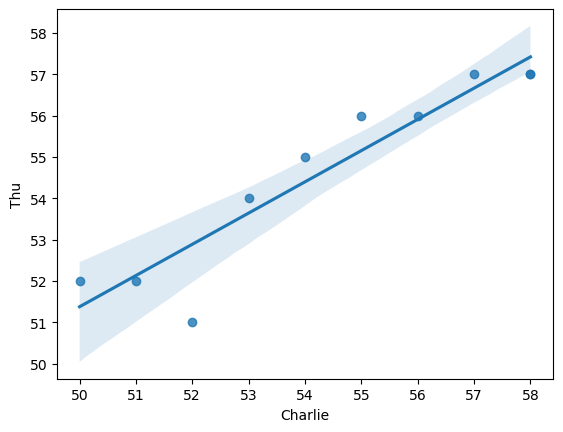

In [25]:
ax = sns.regplot(x="Charlie", y="Thu", data=df)

Are there significant differeneces between the measures by each person?

#### Paired t test
Assumptions:  
Continous dependent variable  
Independant observations   
Normally distributed dependent variable (at least largely - the test is quite robust to this)  
No major outliers  

Check normalcy of data

<AxesSubplot:xlabel='Charlie', ylabel='Count'>

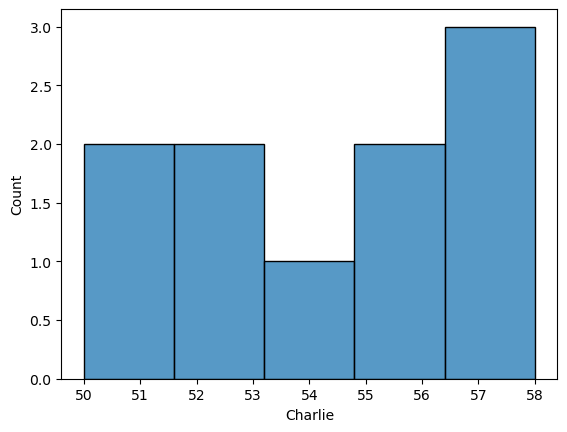

In [26]:
sns.histplot(data=df, x='Charlie')

In [ ]:
Not looking very normal...

In [28]:
# test for P's measures
stat, p = shapiro(df['Charlie'])
print('Statistics=%.3f, p=%.3f' % (stat, p))


alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.942, p=0.578
Sample looks Gaussian (fail to reject H0)


<AxesSubplot:xlabel='Thu', ylabel='Count'>

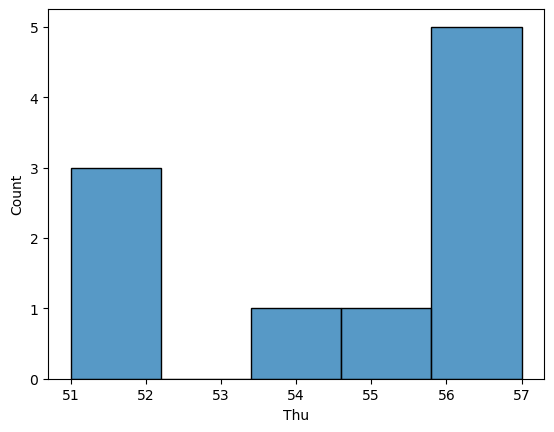

In [29]:
sns.histplot(data=df, x='Thu')

In [30]:
# test for C's measures
stat, p = shapiro(df['Thu'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.863, p=0.084
Sample looks Gaussian (fail to reject H0)


In [31]:
stats.ttest_rel(df['Charlie'], df['Thu'])

Ttest_relResult(statistic=-0.8955334711889903, pvalue=0.39382281469156144)

Cannot reject the null hypothesis - the two sets of measurements are not significantly different

#### Average the two measurements
As the two measures are not significantly different we'll average them and make a new column of this in the dataframe

In [32]:
df['Av_diameter'] = df[['Charlie','Thu']].mean(axis=1)

In [33]:
df.head(3)

,Group_member,Group,Charlie,Thu,Av_diameter
0,Aaron,us,56,56,56.0
1,Alice,us,58,57,57.5
2,Charlie,us,51,52,51.5


### Are the groups different?

In [34]:
df.groupby('Group').mean()

,Charlie,Thu,Av_diameter
Group,,,
them,54.4,55.0,54.7
us,54.4,54.4,54.4


<AxesSubplot:xlabel='Group', ylabel='Av_diameter'>

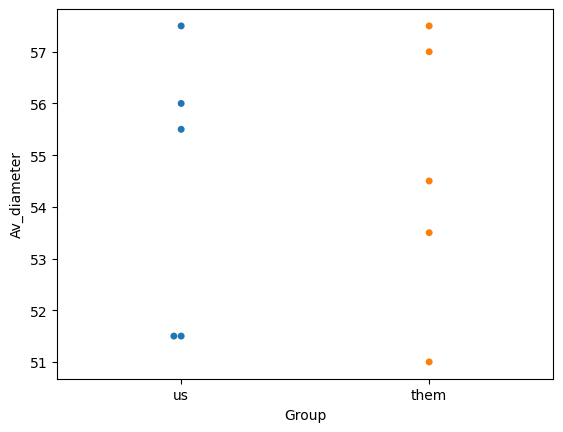

In [36]:
sns.swarmplot(x="Group", y="Av_diameter", data=df)

Are head circumfrences normally distributed?

<AxesSubplot:xlabel='Av_diameter', ylabel='Count'>

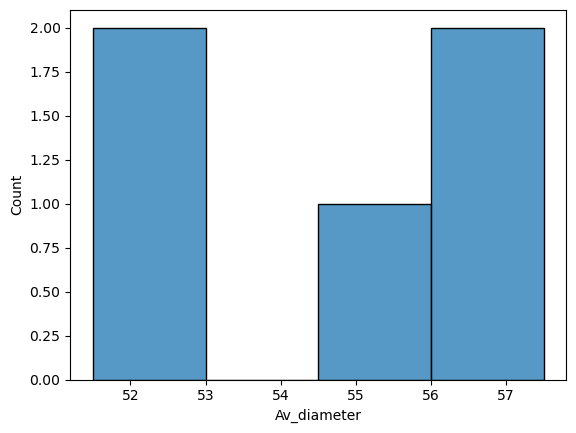

In [37]:
sns.histplot(data = df[df.Group == "us"], x='Av_diameter')

<AxesSubplot:xlabel='Av_diameter', ylabel='Count'>

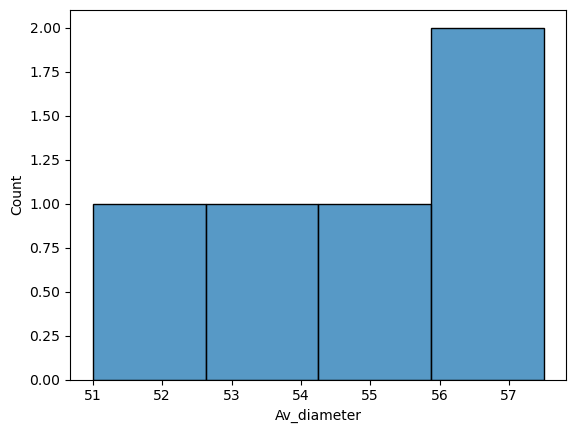

In [38]:
sns.histplot(data = df[df.Group == "them"], x='Av_diameter')

Don't look very normal.  Use the Shaprio-Wilkes test to check

In [40]:
# test for us
stat, p = shapiro(df['Av_diameter'][df['Group'] == 'us'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.852, p=0.202
Sample looks Gaussian (fail to reject H0)


In [41]:
# test for them
stat, p = shapiro(df['Av_diameter'][df['Group'] == 'them'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.943, p=0.685
Sample looks Gaussian (fail to reject H0)


With this confirmation that the DBH distributions are unlikely to be non-normal we'll use a t-test to see if the two groups differ in head diameter

### T-test

In [39]:
stats.ttest_ind(df['Av_diameter'][df['Group'] == 'us'],
                df['Av_diameter'][df['Group'] == 'them'])

Ttest_indResult(statistic=-0.17541160386140833, pvalue=0.865114742593742)

In [69]:
stats.ttest_ind(df['Av_DBH'][df['Row'] == 1],
                df['Av_DBH'][df['Row'] == 2])

Ttest_indResult(statistic=0.07167791278239664, pvalue=0.9436947593843594)

### Now for the intelligence part!  
Add your marks for the quiz into the dataframe, replacing the text here:

In [ ]:
df[quiz] = ['Aaron_mark', 'Alice_mark', 'Charlie_mark', 'Thibauld_mark', 'Thu_mark', 'Pakkapol_mark', 'Saima_mark', 'Hillary_mark', 'Faye_mark', 'Xiao-feng_mark']

Look at the distribution, check for differences between groups, plot mark by average head diameter.

Demonstrators will gather anonymised head/quiz data from everyone so we can plot the data for the whole class.  This data wil be put into a sharepoint document which can be read in using this code (once it is complete!)

Is there a correlation between head size and abiltiy to recall data analysis skills from last year?